## Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

## The Dataset

In [6]:
mobiles = pd.read_csv("mobiles_dataset.csv")

## Part 1. Analytical Questions

All the answers to questions and summaries of analysis I provided in my R (.rmd) file. Here, I only did visualizations.

#### Converting Currencies to Dollars

In [11]:
mobiles["USD_Pakistan"] = mobiles["Launched.Price.Pakistan.PKR"] * 0.0036
mobiles["USD_India"] = mobiles["Launched.Price.India.INR"] * 0.011
mobiles["USD_China"] = mobiles["Launched.Price.China.CNY"] * 0.14
mobiles["USD_USA"] = mobiles["Launched.Price.USA.USD"]
mobiles["USD_Dubai"] = mobiles["Launched.Price.Dubai.AED"] * 0.27

### 1. Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?

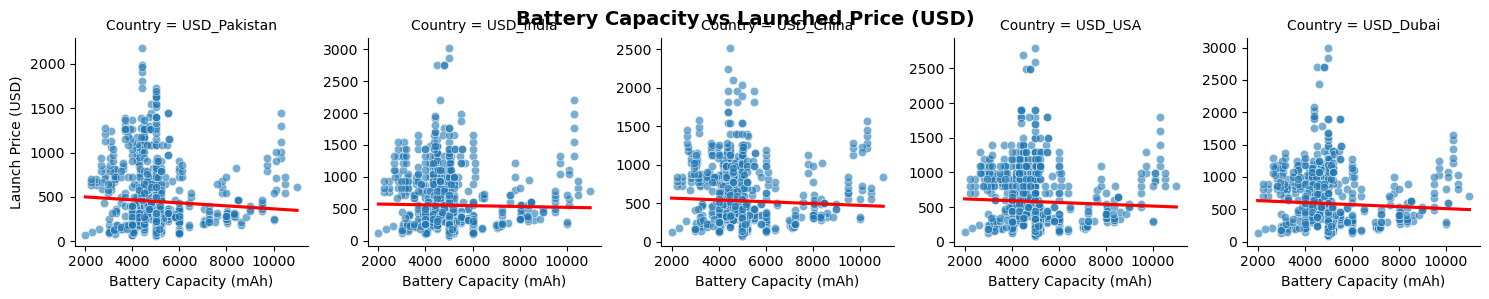

                      Battery.Capacity.mAh  USD_Pakistan  USD_India  \
Battery.Capacity.mAh              1.000000     -0.060913  -0.019054   
USD_Pakistan                     -0.060913      1.000000   0.903831   
USD_India                        -0.019054      0.903831   1.000000   
USD_China                        -0.041043      0.902354   0.967194   
USD_USA                          -0.041137      0.897739   0.969135   
USD_Dubai                        -0.048908      0.898563   0.968952   

                      USD_China   USD_USA  USD_Dubai  
Battery.Capacity.mAh  -0.041043 -0.041137  -0.048908  
USD_Pakistan           0.902354  0.897739   0.898563  
USD_India              0.967194  0.969135   0.968952  
USD_China              1.000000  0.968203   0.969291  
USD_USA                0.968203  1.000000   0.990262  
USD_Dubai              0.969291  0.990262   1.000000  

Linear Regression Model for USD_Pakistan:
Intercept: 533.9845811253674
Coefficient: -0.016774408811573948
R² Score: 

In [14]:
mobiles_converted1 = pd.melt(
    mobiles, 
    id_vars=["Battery.Capacity.mAh"], 
    value_vars=["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"], 
    var_name="Country", 
    value_name="Price"
)

g = sns.FacetGrid(mobiles_converted1, col="Country", sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="Battery.Capacity.mAh", y="Price", alpha=0.6)
g.map_dataframe(sns.regplot, x="Battery.Capacity.mAh", y="Price", scatter=False, ci=None, line_kws={"color": "red"})
g.set_axis_labels("Battery Capacity (mAh)", "Launch Price (USD)")
g.fig.suptitle("Battery Capacity vs Launched Price (USD)", fontsize=14, fontweight="bold")
plt.show()


# correlation

cor_results1 = mobiles[["Battery.Capacity.mAh", "USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]].corr()
print(cor_results1)


# linear regression

lm_model1 = {}
for country in ["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]:
    X = mobiles[["Battery.Capacity.mAh"]].values.reshape(-1, 1)
    y = mobiles[country].values
    model = LinearRegression().fit(X, y)
    lm_model1[country] = model

for country, model in lm_model1.items():
    print(f"\nLinear Regression Model for {country}:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"R² Score: {model.score(X, y)}")

### 2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors?

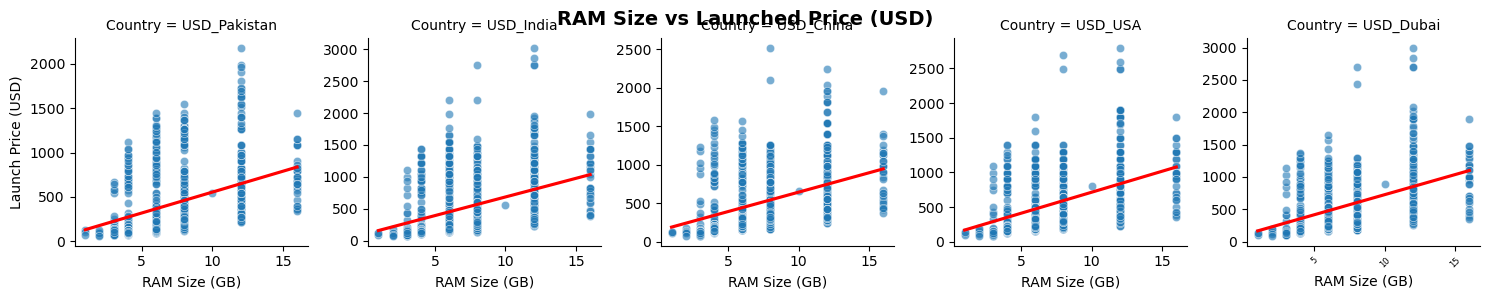

                   RAM  USD_Pakistan  USD_India  USD_China   USD_USA  \
RAM           1.000000      0.408978   0.416193   0.421685  0.461950   
USD_Pakistan  0.408978      1.000000   0.903831   0.902354  0.897739   
USD_India     0.416193      0.903831   1.000000   0.967194  0.969135   
USD_China     0.421685      0.902354   0.967194   1.000000  0.968203   
USD_USA       0.461950      0.897739   0.969135   0.968203  1.000000   
USD_Dubai     0.473007      0.898563   0.968952   0.969291  0.990262   

              USD_Dubai  
RAM            0.473007  
USD_Pakistan   0.898563  
USD_India      0.968952  
USD_China      0.969291  
USD_USA        0.990262  
USD_Dubai      1.000000  

Linear Regression Model for USD_Pakistan:
Intercept: 85.11676899666094
Coefficient: 46.953688531805845
R² Score: 0.10411289764147758

Linear Regression Model for USD_India:
Intercept: 97.93410655639241
Coefficient: 58.54638339158715
R² Score: 0.21662330219287051

Linear Regression Model for USD_China:
Intercept

In [21]:
mobiles["RAM"] = mobiles["RAM"].str.extract(r"(\d+)").astype(float)


mobiles_converted2 = pd.melt(
    mobiles, 
    id_vars=["RAM"], 
    value_vars=["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"], 
    var_name="Country", 
    value_name="Price"
)

g = sns.FacetGrid(mobiles_converted2, col="Country", sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="RAM", y="Price", alpha=0.6)
g.map_dataframe(sns.regplot, x="RAM", y="Price", scatter=False, ci=None, line_kws={"color": "red"})
g.set_axis_labels("RAM Size (GB)", "Launch Price (USD)")
g.fig.suptitle("RAM Size vs Launched Price (USD)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=6)
plt.show()


# correlation

cor_results2 = mobiles[["RAM", "USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]].corr()
print(cor_results2)


# linear regression

lm_model2 = {}
for country in ["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]:
    X = mobiles[["RAM"]].values.reshape(-1, 1)
    y = mobiles[country].values
    model = LinearRegression().fit(X, y)
    lm_model2[country] = model

for country, model in lm_model2.items():
    print(f"\nLinear Regression Model for {country}:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"R² Score: {model.score(X, y)}")

### 3. Do Apple devices have a higher price variation across different regions compared to other brands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions?

In [24]:
brand_price = mobiles.groupby("Company.Name").agg({
    "USD_Pakistan": lambda x: np.std(x, ddof=1),
    "USD_India": lambda x: np.std(x, ddof=1),
    "USD_China": lambda x: np.std(x, ddof=1),
    "USD_USA": lambda x: np.std(x, ddof=1),
    "USD_Dubai": lambda x: np.std(x, ddof=1),
}).reset_index()

brand_price.columns = ["Company.Name", "SD_Pakistan", "SD_India", "SD_China", "SD_USA", "SD_Dubai"]

print(brand_price)


apple_price = mobiles[mobiles["Company.Name"] == "Apple"][["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]]

apple_summary = pd.DataFrame({
    "Max_Price": [apple_price.max().max()],
    "Min_Price": [apple_price.min().min()],
    "Markup": [apple_price.max().max() - apple_price.min().min()]
})

print(apple_summary)

   Company.Name  SD_Pakistan    SD_India    SD_China      SD_USA    SD_Dubai
0         Apple   278.189461  324.608362  249.298702  247.896867  234.097558
1        Google   288.203500  394.857611  373.946164  345.839214  353.679879
2         Honor   327.685524  410.058511  330.737927  440.569257  435.075539
3        Huawei   298.221398  739.966126  543.582889  672.511062  722.207027
4       Infinix    79.719779   88.910469   94.973728  104.805943  105.422375
5        Lenovo   192.524284  206.292033  149.897854  154.710175  160.779330
6      Motorola   228.772730  254.376849  250.426369  295.592206  293.323556
7         Nokia    53.767499   49.672846   43.402509   38.658045   40.529989
8       OnePlus   229.454713  215.567521  216.532644  231.025825  253.089174
9          Oppo   185.822420  325.040167  272.756619  293.899084  267.412351
10         Poco    89.666058  102.065838   96.533380  108.733453  109.762394
11       Realme    94.444518  121.526987   98.239796   91.115096   88.916889

### 4. Do all smartphone brands have flagship and budget-friendly models, or do some brands only focus on premium devices?

In [29]:
mobiles["Category"] = np.select(
    [
        mobiles["USD_USA"] < 300,
        (mobiles["USD_USA"] >= 300) & (mobiles["USD_USA"] <= 700),
        mobiles["USD_USA"] > 700
    ],
    ["Budget", "Mid-range", "Premium"],
    default=None
)

brand = mobiles.groupby(["Company.Name", "Category"]).size().reset_index(name="Count")

print(brand)

   Company.Name   Category  Count
0         Apple  Mid-range      8
1         Apple    Premium     89
2        Google  Mid-range     12
3        Google    Premium      9
4         Honor     Budget     29
5         Honor  Mid-range     37
6         Honor    Premium     25
7        Huawei  Mid-range     15
8        Huawei    Premium     27
9       Infinix     Budget     41
10      Infinix  Mid-range     15
11       Lenovo     Budget     10
12       Lenovo  Mid-range      5
13     Motorola     Budget     22
14     Motorola  Mid-range     33
15     Motorola    Premium      7
16        Nokia     Budget     10
17      OnePlus     Budget     10
18      OnePlus  Mid-range     23
19      OnePlus    Premium     20
20         Oppo     Budget     46
21         Oppo  Mid-range     59
22         Oppo    Premium     24
23         Poco     Budget     17
24         Poco  Mid-range     15
25       Realme     Budget     43
26       Realme  Mid-range     26
27      Samsung     Budget     26
28      Samsun

### 5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?

In [32]:
avg_price = mobiles[["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]].mean(skipna=True)
avg_price_df = pd.DataFrame(avg_price, columns=["Avg_Price"]).T
print(avg_price_df)

brand_region_price = mobiles.groupby("Company.Name")[["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]].mean().reset_index()
print(brand_region_price)

           USD_Pakistan   USD_India   USD_China     USD_USA   USD_Dubai
Avg_Price    449.934239  552.823682  530.741362  579.623784  586.029016
   Company.Name  USD_Pakistan    USD_India    USD_China      USD_USA  \
0         Apple    891.460318  1132.984577  1005.423711  1028.484536   
1        Google    620.567829   773.655667   848.526667   755.190476   
2         Honor    432.629367   537.357132   471.706154   607.571429   
3        Huawei    660.725143  1130.784286   960.790000  1116.571429   
4       Infinix    158.074971   190.524714   218.610000   245.071429   
5        Lenovo    226.796400   279.316400   294.784000   311.666667   
6      Motorola    329.686723   370.618032   378.311613   433.258065   
7         Nokia    186.476400   146.839000   160.860000   174.000000   
8       OnePlus    485.317291   503.083340   552.992075   608.622642   
9          Oppo    341.521981   481.342946   477.487907   505.279070   
10         Poco    212.333625   250.754625   287.735000   308.43

## Part 2. Visualization

### 1. Plot a bar chart for average price per region in USD.

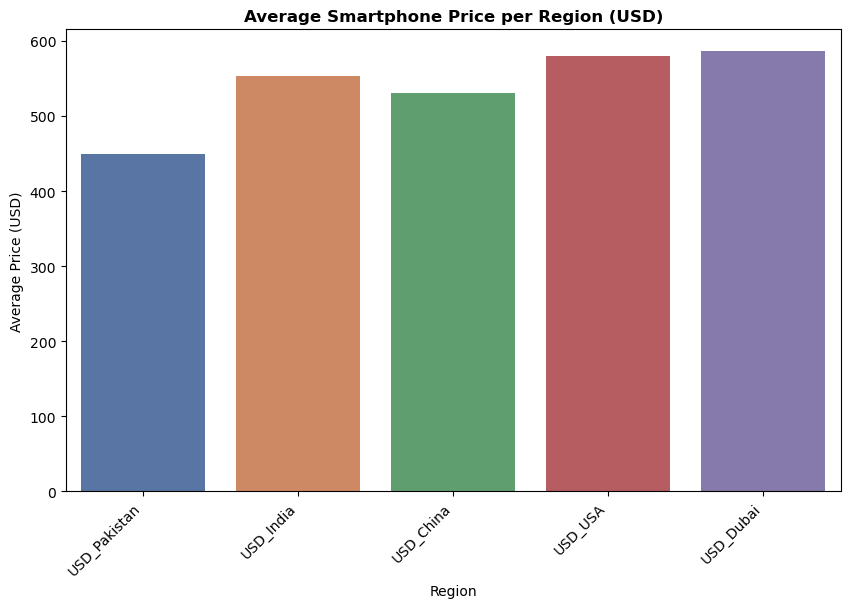

In [30]:
regions = ["USD_Pakistan", "USD_India", "USD_China", "USD_USA", "USD_Dubai"]
avg_prices = []

for region in regions:
    avg_price = mobiles[region].mean(skipna=True)
    avg_prices.append(avg_price)

region_avg_price = pd.DataFrame({
    'Region': regions,
    'Avg_Price_USD': avg_prices
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Avg_Price_USD', data=region_avg_price, hue="Region", palette='deep', legend=False)

plt.title('Average Smartphone Price per Region (USD)', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')

plt.show()

### 2. Plot a bar chart for average price per region in USD.

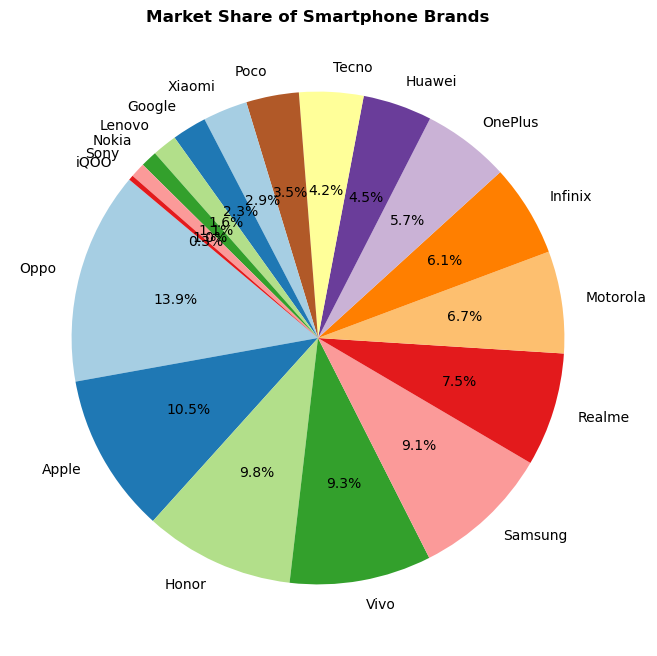

In [34]:
market_share = mobiles["Company.Name"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Market Share of Smartphone Brands", fontweight="bold")

plt.show()